# Preliminaries

In [1]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn
plt.style.use('seaborn-whitegrid')
%matplotlib inline

In [2]:
#Import data
train=pd.read_csv('titanic-data/train.csv')
test=pd.read_csv('titanic-data/test.csv')

# Part 1: Exploratory Data Analysis

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train=train.set_index('PassengerId')

In [5]:
train.count()

Survived    891
Pclass      891
Name        891
Sex         891
Age         714
SibSp       891
Parch       891
Ticket      891
Fare        891
Cabin       204
Embarked    889
dtype: int64

In [6]:
train.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [7]:
test.count()

PassengerId    418
Pclass         418
Name           418
Sex            418
Age            332
SibSp          418
Parch          418
Ticket         418
Fare           417
Cabin           91
Embarked       418
dtype: int64

In [8]:
test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [9]:
train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
print(train.groupby('Sex')[['Survived']].sum())

        Survived
Sex             
female       233
male         109


In [11]:
print(train.groupby(['Sex','Embarked'])[['Survived']].count().unstack())

         Survived         
Embarked        C   Q    S
Sex                       
female         73  36  203
male           95  41  441


In [12]:
print(train.groupby(['SibSp','Sex'])[['Survived']].mean().unstack())

       Survived          
Sex      female      male
SibSp                    
0      0.787356  0.168203
1      0.754717  0.310680
2      0.769231  0.200000
3      0.363636  0.000000
4      0.333333  0.083333
5      0.000000  0.000000
8      0.000000  0.000000


In [13]:
age=pd.cut(train['Age'],[0,1,10,20,30,40,50,60,70,80])
train.groupby(['Pclass',age])['Survived'].mean().unstack()

Age,"(0, 1]","(1, 10]","(10, 20]","(20, 30]","(30, 40]","(40, 50]","(50, 60]","(60, 70]","(70, 80]"
Pclass,,,,,,,,,
1,1.00,0.500000,0.833333,0.725000,0.755102,0.567568,0.600000,0.181818,0.333333
2,1.00,1.000000,0.500000,0.409836,0.441860,0.526316,0.166667,0.333333,NaN
3,0.75,0.361111,0.253165,0.232558,0.206349,0.066667,0.000000,0.333333,0.000000


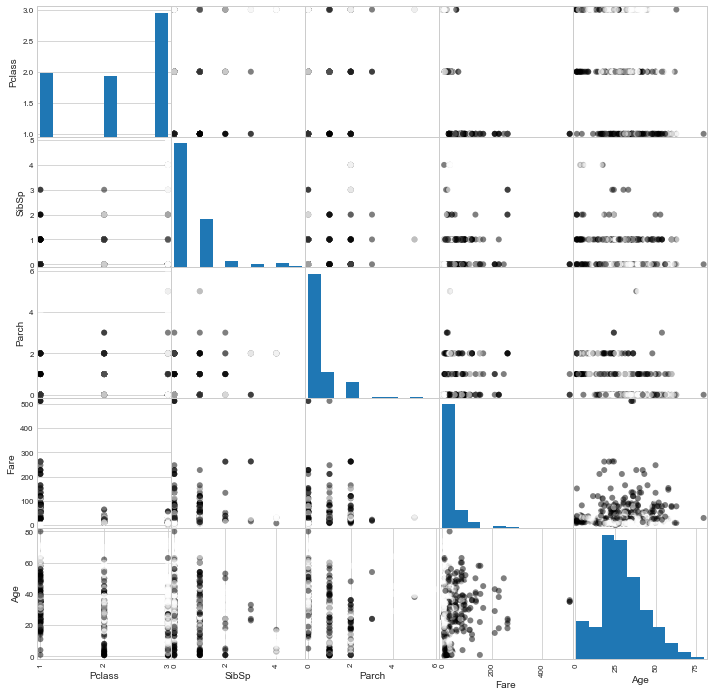

In [14]:
ctrain = train.drop('Cabin', 1)
ctrain=ctrain.dropna()
X_train = ctrain[['Pclass', 'Sex', 'SibSp','Parch','Fare', 'Age','Embarked']]
y_train = ctrain['Survived']

scatter = pd.plotting.scatter_matrix(X_train, c= y_train, marker = 'o', figsize=(12,12))

# Part 2 : Modelling

## Filling and selecting data

In [15]:
from sklearn.impute import SimpleImputer
#Fill missing age data with the mean age
imp1 = SimpleImputer(missing_values=np.nan, strategy='mean')
train['Age'] = imp1.fit_transform(train[['Age']])
test['Age'] = imp1.fit_transform(test[['Age']])

#Fill missing fare and embarked data with most frequent value
imp2 = SimpleImputer(strategy="most_frequent")
train[['Embarked','Fare']] = imp2.fit_transform(train[['Embarked','Fare']])
test[['Embarked','Fare']] = imp2.fit_transform(test[['Embarked','Fare']])

# Convert categorical 'Sex' and 'Embarked' values to numerical values
train[["Sex","Embarked"]] = train[["Sex","Embarked"]].astype('category')
train["Sex"] = train["Sex"].cat.codes
train["Embarked"] = train["Embarked"].cat.codes
test[["Sex","Embarked"]] = test[["Sex","Embarked"]].astype('category')
test["Sex"] = test["Sex"].cat.codes
test["Embarked"] = test["Embarked"].cat.codes

In [16]:
X_all = train[['Pclass', 'Sex', 'SibSp','Parch','Fare', 'Age','Embarked']]
y_all = train[['Survived']]

# Split the training sample into training and test to check for accuracy and adjust the model
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all)

## Final testing sample
#X_testkg = test[['Pclass', 'Sex', 'SibSp','Parch','Fare', 'Age','Embarked']]


## Testing knn classifier with differnt ks

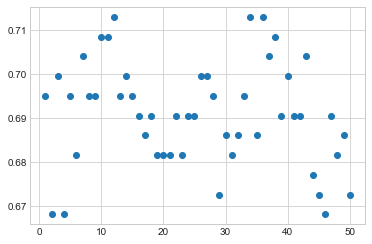

In [17]:
from sklearn.neighbors import KNeighborsClassifier

scores_knnd={}
scores_knn=[]
x = np.linspace(1, 50, dtype = int)
for i in x:
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train.values.ravel())
    score=knn.score(X_test, y_test)
    scores_knnd[i]=score
    scores_knn.append(score)

plt.plot(x,scores_knn,'o')

#different splittings lead to different values, but in general results are good with k of approximately 10.


# Logistic regression

In [18]:
from sklearn.linear_model import LogisticRegression
lre = LogisticRegression(C=1e5,max_iter=1000)
lre=lre.fit(X_train, y_train.values.ravel())
score=lre.score(X_test, y_test)
print(score)


0.8026905829596412


# Decision tree

In [19]:
from sklearn import tree

dtr = tree.DecisionTreeClassifier()
dtr = dtr.fit(X_train, y_train.values.ravel())
score = dtr.score(X_test, y_test)
print(score)


0.7533632286995515


## Support vector machines (SVMs)

In [20]:
from sklearn import svm

svc = svm.SVC()
svc=svc.fit(X_train, y_train.values.ravel())
score = svc.score(X_test, y_test)
print(score)

nsvc = svm.NuSVC()
nsvc=nsvc.fit(X_train, y_train.values.ravel())
score = nsvc.score(X_test, y_test)
print(score)



0.6771300448430493
0.7847533632286996


## Stochastic gradient descent

In [21]:
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier(loss="hinge", penalty="l2", max_iter=100)
sgd.fit(X_train, y_train.values.ravel())
score = sgd.score(X_test, y_test.values.ravel())
print(score)

0.7309417040358744


## Random forest classifier

In [22]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
rfc=RandomForestClassifier(n_estimators=90, max_features=0.5)
rfc.fit(X_train, y_train.values.ravel())
score = rfc.score(X_test, y_test.values.ravel())
print(score)

abc=AdaBoostClassifier()
abc.fit(X_train, y_train.values.ravel())
score = abc.score(X_test, y_test.values.ravel())
print(score)

0.7982062780269058
0.7847533632286996


# 3. Solve for Kaggle 

The best results in general (spliting the data randomly different times) were the ones using the rendom forest classifier. Here we train in for the entire train dataset and generate predictions for Kaggle's test sample.

In [23]:
# Final testing sample
X_testkg = test[['Pclass', 'Sex', 'SibSp','Parch','Fare', 'Age','Embarked']]

rfcf=RandomForestClassifier(n_estimators=90, max_features=0.5)
rfcf.fit(X_all, y_all.values.ravel())
score = rfcf.score(X_all, y_all.values.ravel())
predictions=rfcf.predict(X_testkg)
print(score)
print(len(predictions))

0.9820426487093153
418


In [24]:
# Write results to a csv
results = pd.Series(predictions, index=test['PassengerId'],name='Survived') 
#results.rename('Survived')

print(results)
results.to_csv("titanic1023.csv")

PassengerId
892     0
893     0
894     0
895     1
896     1
       ..
1305    0
1306    1
1307    0
1308    0
1309    1
Name: Survived, Length: 418, dtype: int64


In [25]:
# This model resulted in a score of 0.7676 on Kaggle

In [35]:
# Trying the same with logistic regression
lref = LogisticRegression(C=1,max_iter=1000)
lref=lref.fit(X_all, y_all.values.ravel())
score = lref.score(X_all, y_all.values.ravel())
predictions2=lref.predict(X_testkg)
print(score)

results = pd.Series(predictions2, index=test['PassengerId'],name='Survived') 

print(results)
#results.to_csv("titaniclre.csv")

0.8002244668911336
PassengerId
892     0
893     0
894     0
895     0
896     1
       ..
1305    0
1306    1
1307    0
1308    0
1309    0
Name: Survived, Length: 418, dtype: int64


In [27]:
#Decision trees
dtrf = tree.DecisionTreeClassifier()
dtrf = dtrf.fit(X_all, y_all.values.ravel())
score = dtrf.score(X_all, y_all.values.ravel())
predictions3=dtrf.predict(X_testkg)
print(score)
results = pd.Series(predictions3, index=test['PassengerId'],name='Survived') 

print(results)
results.to_csv("titanicdtr.csv")


0.9820426487093153
PassengerId
892     0
893     0
894     1
895     1
896     1
       ..
1305    0
1306    1
1307    0
1308    0
1309    0
Name: Survived, Length: 418, dtype: int64


In [28]:
nsvcf = svm.NuSVC()
nsvcf=nsvcf.fit(X_train, y_train.values.ravel())
score = nsvcf.score(X_all, y_all.values.ravel())
predictions4=nsvcf.predict(X_testkg)
print(score)
results = pd.Series(predictions4, index=test['PassengerId'],name='Survived') 

print(results)
results.to_csv("titanicsvc.csv")

0.8080808080808081
PassengerId
892     0
893     1
894     0
895     0
896     1
       ..
1305    0
1306    1
1307    0
1308    0
1309    0
Name: Survived, Length: 418, dtype: int64
